In [1]:
# sys, file and nav packages:
import os
import datetime as dt
import csv

# math packages:
import pandas as pd
import math
import numpy as np
import datetime as dt 

from scipy import stats
from scipy.stats import kendalltau, pearsonr, spearmanr
# from scipy.stats import gamma
# from scipy.stats import beta
# from scipy.stats import binom
# from scipy.stats import bernoulli

# import statsmodels.api as sm
# from statsmodels.graphics.gofplots import qqplot_2samples
# from statsmodels.distributions.empirical_distribution import ECDF

# charting:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import ticker
import matplotlib.ticker as mtick
import seaborn as sns
# from matplotlib.gridspec import GridSpec
# from matplotlib import cm
# from matplotlib.colors import ListedColormap, LinearSegmentedColormap, Colormap

# mapping
# import geopandas as gpd

# home brew utitilties
import resources.utilities.utility_functions as ut
import resources.utilities.abundance_classes as ac

# documenting
from IPython.display import display, Markdown, Latex, HTML


# returns the p_value for each test
def kendall_pval(x,y):
    return kendalltau(x,y)[1]

def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]

def spearmanr_pval(x,y):
    return spearmanr(x,y)[1]

# table kwargs
table_k = dict(loc="top left", bbox=(0,0,1,1), colWidths=[.5, .5], cellLoc='center')
tablecenter_k = dict(loc="top left", bbox=(0,0,1,1), cellLoc='center')
tabtickp_k = dict(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False)

# chart kwargs
title_k = {'loc':'left', 'pad':14, 'linespacing':1.5, 'fontsize':12}
title_k14 = {'loc':'left', 'pad':16, 'linespacing':1.5, 'fontsize':14}
xlab_k = {'labelpad':10, 'fontsize':12}
ylab_k = {'labelpad':14, 'fontsize':14}


# # use these to format date axis in charts
# weeks = mdates.WeekdayLocator(byweekday=1, interval=4)
# # onedayweek = mdates.DayLocator(bymonthday=1, interval=1)
# # everytwoweeks = mdates.WeekdayLocator(byweekday=1, interval=4)

# months = mdates.MonthLocator(bymonth=[3,6,9,12])
# bimonthly = mdates.MonthLocator(bymonth=[1,3,5,7,9,11])
# allmonths = mdates.MonthLocator()
# wks_fmt = mdates.DateFormatter('%d')
# mths_fmt = mdates.DateFormatter('%b')

# map marker size:
survey_data, location_data, code_defs, geo_data, output = ut.make_local_paths()

### Discussion:

Based on the 
#### geographic spread

While 
#### abundance - regional differences

After tobacco objects, Polystrene pieces are ~13% of the total objects found, followed by plastic sheeting ~5%, and waste water ~5%. The most numerous objects are different for each water feature. For example on Lac Léman, Brienzersee and Lago Maggiore polystyrene and food products replace tobacco products as the the most numerous objects __\(figure 3, 4 and 5\)__.

#### influences

results suggest 

#### just cigarette butts

Considered individually
### Conclusion

Considered 

In [2]:
# set some parameters:
start_date = '2020-04-01'
end_date = '2021-04-01'

startyearmonth = '{}/{}'.format(start_date[5:7], start_date[:4])
endyearmonth = '{}/{}'.format(end_date[5:7], end_date[:4]) 

# decide which data to use
aggregated = False


# collect the names:
# group_names = list(these_groups.keys())

# choose a lake:
# lake = 'Lac Léman'
# coi = 'Neuchâtel'
# bassin_label = 'Aare'
# bassin = ['Aare', 'Aare|Nidau-Büren-Kanal','Schüss', 'Neuenburgersee', 'Thunersee','Bielersee', 'Brienzersee','La Thièle']
# bassin_lmn = ['Rhône', 'Lac Léman']
# samples_all = 'All samples'



# define a significant event:
sig = .9
one_minus_sig = (1-sig)

# define explanatory variables:
expv = ['population','streets','buildings','rivs']

# name the folder:
name_of_project = 'setup_class_methods'

# use this to store things:
project_directory = ut.make_project_folder(output, name_of_project)

# keep track of output
files_generated = []
figure_num = 0
data_num = 0

def add_output(**kwargs):
    files_generated.append({'tag':kwargs['tag'], 'number':kwargs['figure_num'], 'file':kwargs['file'],'type':kwargs['a_type']})
    if kwargs['a_type'] == 'data':
        kwargs['data'].to_csv(F"{kwargs['file']}.csv", index=False)
    else:
        plt.savefig(F"{kwargs['file']}.jpeg", dpi=300)

In [3]:
# get the data
dutch_surveys = pd.read_csv(F"{output}/harmonized_results/dutch_harmonized.csv")

dutch_beaches = pd.read_csv(F"{output}/harmonized_results/dutch_admin_h.csv")

dutch_codes = pd.read_csv(F"{code_defs}/new_dutch_codes.csv")


# the dutch codes set the start and end
start_date = dutch_surveys['date'].min()
end_date = dutch_surveys['date'].max()

In [4]:
# use the aggregated hd data. This accounts for the custom codes used in Switzerland
swiss_surveys = pd.read_csv(survey_data+'/aggregated_hd_surveys.csv')

# these are the water features that drain to the Rhine:
water_names = ['Aare', 'Sihl', 'Reuss', 'Rhein', 'Limmat', 'Seez','Zurichsee','Quatre Cantons', 'Vorderrhein', 'Zugersee','Glatt', 'Goldach', 'Greifensee','Bodensee', 'Chriesbach', 'Emme', 'Neuenburgersee', 'Walensee' ]

# format the date and slice the data 
swiss_surveys['date'] = pd.to_datetime(swiss_surveys['date'], format='%Y-%m-%d')
swissDf = swiss_surveys[(swiss_surveys.date >= start_date)&(swiss_surveys.date <= end_date)].copy()

# location data
swiss_beaches = pd.read_csv(location_data+'/hammerdirt_beaches.csv')

# code data from switzerland
swiss_codes = pd.read_csv(F"{code_defs}/swiss_codes_keyed_ospar.csv")

### Harmonize data results for class methods

In [5]:
print(dutch_beaches.columns)
print(swiss_beaches.columns)

Index(['location', 'latitude', 'longitude', 'city', 'country', 'water_name',
       'water', 'lat_lon', 'slug', 'Gebiedscode'],
      dtype='object')
Index(['slug', 'location', 'latitude', 'longitude', 'city', 'post', 'country',
       'water', 'water_name', 'city_slug', 'water_name_slug', 'is_2020'],
      dtype='object')


In [6]:
dutch_surveys['date'] = pd.to_datetime(dutch_surveys.date, format="%Y-%m-%d")

In [7]:
swiss_beaches.set_index('slug', inplace=True)

# assign the water feature type to each result

# make maps
lakes = swiss_beaches.loc[swiss_beaches.water == 'l'].index
rivers = swiss_beaches.loc[swiss_beaches.water == 'r'].index

# apply maps:
swissDf.loc[swissDf.location.isin(lakes), 'water'] = 'l'
swissDf.loc[swissDf.location.isin(rivers), 'water'] = 'r'

In [8]:
# key in the ospar id to the swiss surveys
swiss_codes.set_index('code', inplace=True)

# map that value
os_mlw_map = swiss_codes.ospar_id

# apply map
swissDf['ospar_id'] = swissDf.code.map(lambda x: os_mlw_map.loc[x] )

# swap the code values
swiss_surveys = swissDf[swissDf.water_name.isin(water_names)].drop('code', axis=1)
swiss_surveys.rename(columns={'ospar_id':'code'}, inplace=True)

# identify the swiss surveys as a group
swiss_surveys['region'] = 'CH'
swiss_surveys.columns

Index(['loc_date', 'date', 'pcs_m', 'quantity', 'location', 'water_name',
       'water', 'code', 'region'],
      dtype='object')

In [9]:
dutch_surveys.columns

Index(['location', 'date', 'loc_date', 'water_name', 'code', 'quantity',
       'pcs_m'],
      dtype='object')

In [10]:
# key the ospar code value into the dutch surveys
current_codes = dutch_surveys.code.unique()

# make a column to store the new code
dutch_surveys['new_code'] = 0

# make a map
d_c_map = dutch_codes[['ID', 'parent_code']]
d_c_map.set_index('ID', drop=True, inplace=True)

# apply map
for a_code in current_codes:
    dutch_surveys.loc[dutch_surveys.code==a_code, 'new_code']= d_c_map.loc[a_code][0]

# swap out the columns
dutch_surveys.drop('code', inplace=True, axis=1)
dutch_surveys.rename(columns={'new_code':'code'}, inplace=True)

# identify the surveys as a whole
dutch_surveys['region'] ='NL'

In [11]:
surveys_all = pd.concat([swiss_surveys, dutch_surveys])

In [12]:
surveys_all.groupby('region').quantity.sum()

region
CH     33929.0
NL    151006.0
Name: quantity, dtype: float64

In [13]:
print(swiss_surveys.quantity.sum(), dutch_surveys.quantity.sum())

s_samps = swiss_surveys.loc_date.nunique()
d_samps = dutch_surveys.loc_date.nunique()
print(s_samps, d_samps)

33929 151006.0
395 382


In [14]:
surveys_all.groupby('region').loc_date.nunique()

region
CH    395
NL    382
Name: loc_date, dtype: int64

In [15]:
# these are the columns that the class method expects to see:
these_cols = ['loc_date', 'location', 'water_name','water', 'date', 'region']

a = ac.PreprocessData(surveys_all, dutch_beaches,these_cols=these_cols)

added exp vs


In [16]:
catchment_cols = ['region','water_name','water','loc_date', 'location', 'date']

clas_kwargs = dict(
#     code_group_data=group_names_locations,
#     new_code_group=frag_plas,
#     levels=levels,
#     catchment_features=bassin,
    end_date=end_date,
    start_date=start_date,
#     code_group_loc=output,
    catchment_cols=catchment_cols)


In [17]:
b = ac.CatchmentArea(a.processed, swiss_beaches, **clas_kwargs)

made code totals


### Geographic spread and frequency

In [18]:
# wfoams = ['G81', 'G82', 'G117']
# yfoams = ['G74', 'G73', 'G75']
# pand = ['G900', 'G901', 'G902']
# candy = ['G30']
# personal_hygiene = dfCodes.loc[dfCodes.source == 'Personal hygiene'].index.to_numpy()
# tobacco_codes = dfCodes.loc[dfCodes.source == 'Tobacco'].index.to_numpy()

# make a copy of the data to work with
som_data = b.bassin_data[b.bassin_data.code != 117].copy()
data_num+=1
# 'tag':kwargs['tag'], 'number':kwargs['figure_num'], 'file':kwargs['file'],'type':kwargs['a_type']
a_tag = 'data used for all calculations'

file = F"{project_directory}/all_data_used.csv"
a_type='data'

add_output(tag=a_tag, figure_num=data_num, a_type=a_type, file=file, data=som_data)

In [19]:
number_of_samples = len(som_data.loc_date.unique())
number_of_locations = len(som_data.location.unique())
number_of_objects = som_data.quantity.sum()
number_of_features = len(som_data.water_name.unique())
print(F"The number of samples, number of locations, the total number of objects and the number of cities:\n\n1. number of samples: {number_of_samples}\n2. number of locations: {number_of_locations}\n3. number of objects: {number_of_objects}\n4. number of features: {number_of_features}\n")
print(F"\nThe data is limited to all samples on or after {start_date} and up to {end_date}")

The number of samples, number of locations, the total number of objects and the number of cities:

1. number of samples: 777
2. number of locations: 255
3. number of objects: 142705.0
4. number of features: 20


The data is limited to all samples on or after 2017-07-04 and up to 2019-04-24


In [20]:
print(F"There are {len(som_data.water_name.unique())} different water features:\n\n{som_data.groupby('region').water_name.unique().to_numpy()}")

There are 20 different water features:

[array(['Aare', 'Bodensee', 'Chriesbach', 'Emme', 'Glatt', 'Goldach',
       'Greifensee', 'Limmat', 'Neuenburgersee', 'Reuss', 'Rhein', 'Sihl',
       'Quatre Cantons', 'Vorderrhein', 'Walensee', 'Zurichsee',
       'Zugersee'], dtype=object)
 array(['Waal', 'Maas', 'Nederrijn'], dtype=object)]


In [21]:
# the number of locations by feature
num_loc_feature = som_data.groupby('water_name', as_index=False).location.nunique()
print(F"The number of sample locations by feature:\n\n{num_loc_feature.set_index('water_name')}")

The number of sample locations by feature:

                location
water_name              
Aare                  10
Bodensee               3
Chriesbach             1
Emme                   3
Glatt                  1
Goldach                1
Greifensee             4
Limmat                 6
Maas                 131
Nederrijn              1
Neuenburgersee         1
Quatre Cantons         3
Reuss                  3
Rhein                  6
Sihl                   7
Vorderrhein            1
Waal                  62
Walensee               1
Zugersee               2
Zurichsee              8


In [22]:
som_data['fail'] = som_data.quantity > 0

In [23]:

dutch_top_ten = som_data[som_data.region == 'NL'].groupby(['code'], as_index=False).quantity.sum().sort_values(by='quantity',ascending=False)
swiss_top_ten = som_data[som_data.region == 'CH'].groupby(['code'], as_index=False).quantity.sum().sort_values(by='quantity',ascending=False)
# dutch_top_ten['% of total'] = dutch_top_ten.quantity/dutch_total
swiss_top_ten.sort_values(by='quantity', ascending=False)[:10]

,code,quantity
51,64,10706.0
36,46,3484.0
75,93,3129.0
53,67,2226.0
16,19,1957.0
38,48,1265.0
62,77,1228.0
31,40,1110.0
71,89,916.0
12,15,637.0


In [24]:
dutch_top_ten.sort_values(by='quantity', ascending=False)[:10]

,code,quantity
34,46,42162.0
17,19,11106.0
13,15,6923.0
5,6,4138.0
3,4,3602.0
75,98,3250.0
36,48,3195.0
19,21,2601.0
43,59,2304.0
24,32,2178.0


In [25]:
dtt_c = dutch_top_ten[:10].code.values
dutch_total = dutch_top_ten.quantity.sum()
dutch_top_ten['% of total'] = dutch_top_ten.quantity/dutch_total

stt_c = swiss_top_ten[:10].code.values
swiss_total = swiss_top_ten.quantity.sum()
swiss_top_ten['% of total'] = swiss_top_ten.quantity/dutch_total

# the top ten for each region
coi_d = dutch_top_ten[dutch_top_ten.code.isin(dtt_c)]
coi_s = swiss_top_ten[swiss_top_ten.code.isin(stt_c)]

# the combined top ten

combined = list(set(stt_c)|set(dtt_c))
combined

[64, 67, 4, 6, 77, 15, 19, 21, 89, 93, 32, 98, 40, 46, 48, 59]

In [26]:
coi_all = som_data[som_data.code.isin(combined)].copy()

# group all the records by loc_date and code
coi_all = coi_all.groupby(['loc_date','location', 'region','water_name', 'code'], as_index=False).agg({'quantity':'sum', 'pcs_m':'mean'})

# check for zero values 
coi_all['fail'] = coi_all.quantity == 0
coi_wt = coi_all.groupby(['water_name', 'code'], as_index=False).agg({'quantity':'sum', 'pcs_m':'mean', 'fail':'sum', 'loc_date':'count'})

# get the number of fails by region (out of how many surveys was at least one found)
coi_at = coi_all.groupby(['region', 'code'], as_index=False).agg({'quantity':'sum', 'pcs_m':'mean', 'fail':'sum', 'loc_date':'count'})

# get the quantity as a % of the total
coi_at['% of total'] = coi_at.quantity/coi_at.quantity.sum()
coi_wt['% of total'] = coi_wt.quantity/coi_wt.quantity.sum()

# get the rate at which the oobject was found
coi_at['% found'] = coi_at.fail/coi_at.loc_date
coi_wt['% found'] = coi_wt.fail/coi_wt.loc_date

# the product of % of total * % found
coi_at['magnitude'] = coi_at['% found']*coi_at['% of total']
coi_wt['magnitude'] = coi_wt['% found']*coi_wt['% of total']

In [27]:
coi_at.head()

,region,code,quantity,pcs_m,fail,loc_date,% of total,% found,magnitude
0,CH,4,263.0,0.008089,288,395,0.002295,0.729114,0.001673
1,CH,6,118.0,0.006937,328,395,0.001030,0.830380,0.000855
2,CH,15,637.0,0.009681,226,395,0.005558,0.572152,0.003180
3,CH,19,1957.0,0.066139,146,395,0.017075,0.369620,0.006311
4,CH,21,178.0,0.010785,320,395,0.001553,0.810127,0.001258


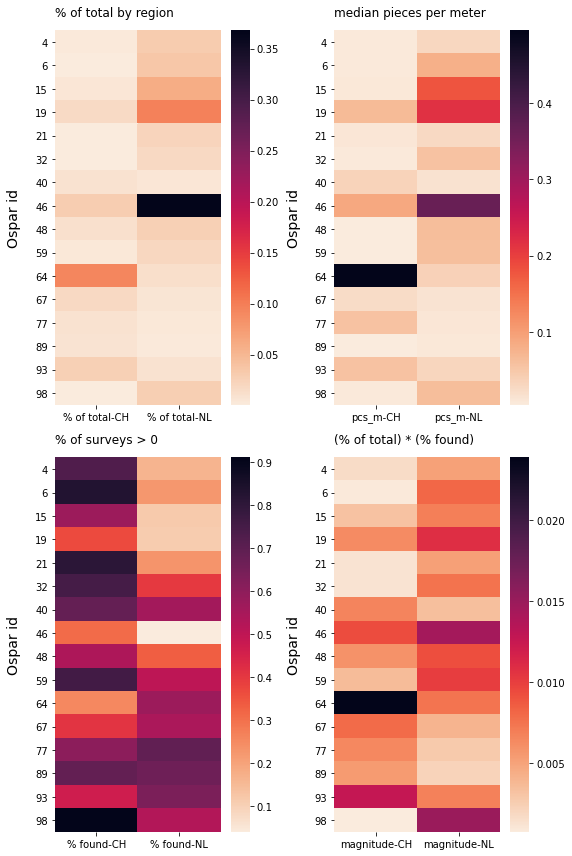

In [28]:
fig, axs = plt.subplots(2,2, figsize=(8,12))

heat_map_data = coi_at[['region', 'code', '% of total']].pivot(index='code', columns='region')
sns.heatmap(data=heat_map_data, cmap='rocket_r', ax=axs[0,0])
axs[0,0].tick_params(axis='y', labelrotation=0)
axs[0,0].set_ylabel("Ospar id", **ylab_k)
axs[0,0].set_xlabel("")
axs[0,0].set_title("% of total by region", **title_k)

heat_map_data = coi_at[['region', 'code', 'pcs_m']].pivot(index='code', columns='region')
sns.heatmap(data=heat_map_data, cmap='rocket_r', ax=axs[0,1])
axs[0,1].tick_params(axis='y', labelrotation=0)
axs[0,1].set_ylabel("Ospar id", **ylab_k)
axs[0,1].set_xlabel("")
axs[0,1].set_title("median pieces per meter", **title_k)

heat_map_data = coi_at[['region', 'code', '% found']].pivot(index='code', columns='region')
sns.heatmap(data=heat_map_data, cmap='rocket_r', ax=axs[1,0])
axs[1,0].tick_params(axis='y', labelrotation=0)
axs[1,0].set_ylabel("Ospar id", **ylab_k)
axs[1,0].set_xlabel("")
axs[1,0].set_title("% of surveys > 0", **title_k)

heat_map_data = coi_at[['region', 'code', 'magnitude']].pivot(index='code', columns='region')
sns.heatmap(data=heat_map_data, cmap='rocket_r', linewidth=.1, ax=axs[1,1])
axs[1,1].tick_params(axis='y', labelrotation=0)
axs[1,1].set_ylabel("Ospar id", **ylab_k)
axs[1,1].set_xlabel("")
axs[1,1].set_title("(% of total) * (% found)", **title_k)

plt.tight_layout()
file_name = F"{project_directory}/combined_top_ten_country.jpg"
plt.savefig(file_name, dpi=300)

plt.show()
plt.close()

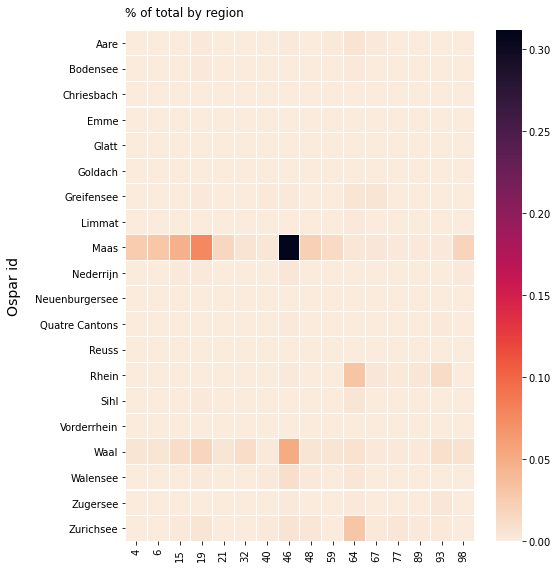

In [39]:
fig, axs = plt.subplots(figsize=(8,8))

heat_map_data = coi_wt[['water_name', 'code', '% of total']].pivot(index='water_name', columns='code')


sns.heatmap(data=heat_map_data, cmap='rocket_r', ax=axs, linewidth=.1)
axs.tick_params(axis='y', labelrotation=0)
axs.set_ylabel("Ospar id", **ylab_k)
axs.set_xlabel("")
axs.set_title("% of total by region", **title_k)
labels = axs.get_xticklabels()
labels = [x.get_text().split('-')[-1] for x in labels]
axs.set_xticklabels(labels)

plt.tight_layout()
file_name = F"{project_directory}/top_ten_percent_feature.jpg"
plt.savefig(file_name, dpi=300)
plt.show()
plt.close()

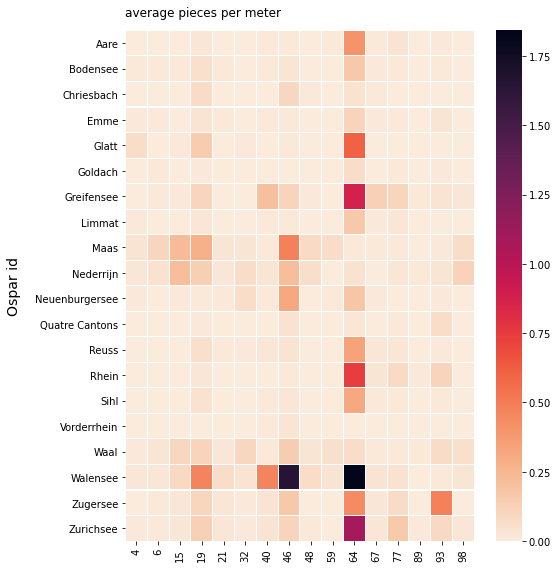

In [40]:
fig, axs = plt.subplots(figsize=(8,8))

heat_map_data = coi_wt[['water_name', 'code', 'pcs_m']].pivot(index='water_name', columns='code')


sns.heatmap(data=heat_map_data, cmap='rocket_r', linewidth=.1, ax=axs)
axs.tick_params(axis='y', labelrotation=0)
axs.set_ylabel("Ospar id", **ylab_k)
axs.set_xlabel("")
axs.set_title("average pieces per meter", **title_k)
labels = axs.get_xticklabels()
labels = [x.get_text().split('-')[-1] for x in labels]
axs.set_xticklabels(labels)

plt.tight_layout()
file_name = F"{project_directory}/top_ten_pcsm_feature.jpg"
plt.savefig(file_name, dpi=300)
plt.show()
plt.close()

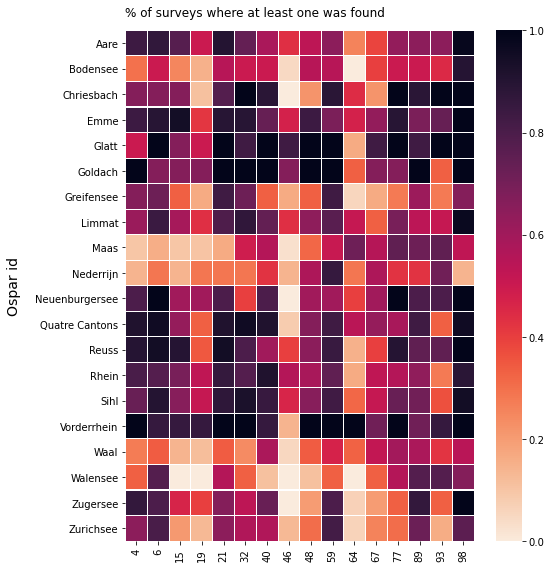

In [38]:
fig, axs = plt.subplots(figsize=(8,8))

heat_map_data = coi_wt[['water_name', 'code', '% found']].pivot(index='water_name', columns='code')


sns.heatmap(data=heat_map_data, cmap='rocket_r',linewidth=.1, ax=axs)
axs.tick_params(axis='y', labelrotation=0)
axs.set_ylabel("Ospar id", **ylab_k)
axs.set_xlabel("")
axs.set_title("% of surveys where at least one was found", **title_k)
labels = axs.get_xticklabels()
labels = [x.get_text().split('-')[-1] for x in labels]
axs.set_xticklabels(labels)

plt.tight_layout()
file_name = F"{project_directory}/more_than_one_found.jpg"
plt.savefig(file_name, dpi=300)
plt.show()
plt.close()

### Abundance: number of objects and percent of total

In [35]:
print("The files generated by this workbook:\n")
files_generated

The files generated by this workbook:



[{'tag': 'data used for all calculations',
  'number': 1,
  'file': 'output/setup_class_methods/all_data_used.csv',
  'type': 'data'}]

#### Hopefully that just worked for you

if not contact analyst@hammerdirt.ch